In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import collections

fields = ['origin', 'destination', 'firstseen']
filenames = []
for i in range(1, 25):
    filenames.append('Data\\flightlist_{}.csv.gz'.format(i))
    
df_from_each_file = (pd.read_csv(f, usecols=fields) for f in filenames)
df = pd.concat(df_from_each_file, ignore_index=True)

# Removing first 4117 rows as they are from 2018
df = df.iloc[4117:]

In [2]:
df.head()

,origin,destination,firstseen
4117,NaN,NaN,2019-01-01 00:00:01+00:00
4118,NaN,KLAX,2019-01-01 00:00:03+00:00
4119,NaN,NZAA,2019-01-01 00:00:04+00:00
4120,NaN,EKCH,2019-01-01 00:00:04+00:00
4121,NaN,LIRF,2019-01-01 00:00:04+00:00


In [3]:
df["firstseen"] = df["firstseen"].apply(lambda x: datetime.datetime.strptime(x.split()[0], '%Y-%m-%d'))

In [4]:
df.head()

,origin,destination,firstseen
4117,NaN,NaN,2019-01-01
4118,NaN,KLAX,2019-01-01
4119,NaN,NZAA,2019-01-01
4120,NaN,EKCH,2019-01-01
4121,NaN,LIRF,2019-01-01


In [5]:
d_counts = df['firstseen'].value_counts().to_dict()

In [33]:
# Generating an ordered dictionary that maps ordered dates -> number of flights
od = collections.OrderedDict(sorted(d_counts.items()))

# Removing outliers from the dataset
newDict = dict()
for key, value in od.items():
    if value > 10000:
        newDict[key] = value
od = newDict

# Using the ordered dictionary to create a 7 day rolling average over the 2 years
averaged_flights = []
dates = []
window_size = 7
ordered_dates = list(od.keys())
ordered_flights = list(od.values())
flights = 0
for i in range(len(od)):
    flights += ordered_flights[i]
    if i % window_size == 0 and i != 0:
        averaged_flights.append(flights/window_size)
        dates.append(ordered_dates[i])
        flights = 0

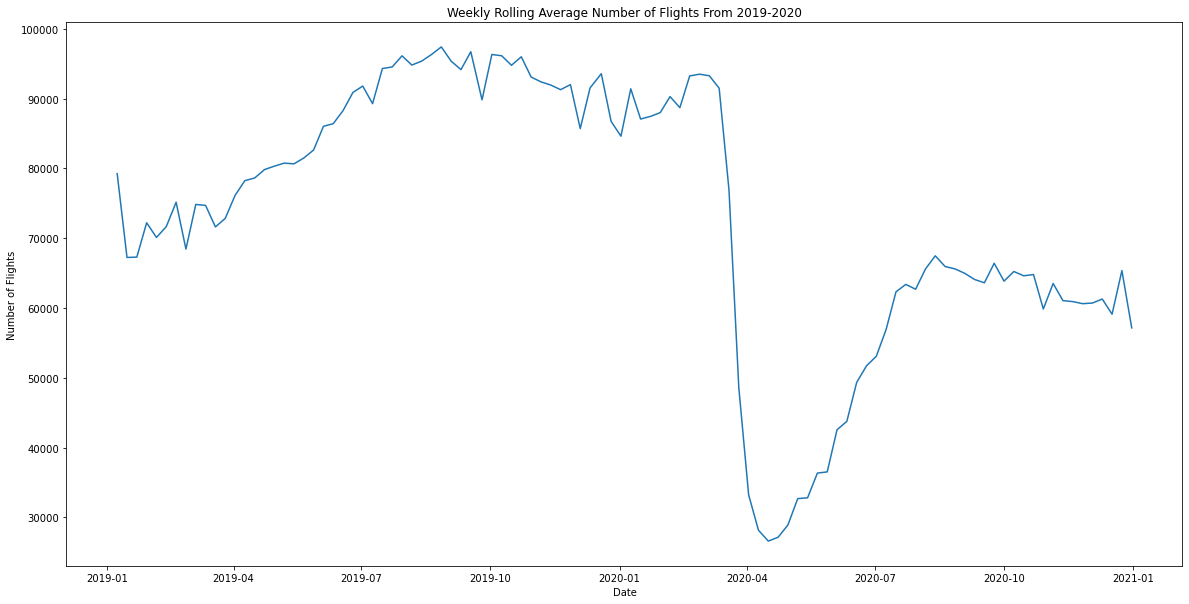

In [64]:
ax = plt.figure(figsize=(20,10)).add_subplot(111)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Flights")
ax.set_title("Weekly Rolling Average Number of Flights From 2019-2020")
plt.plot(dates, averaged_flights)

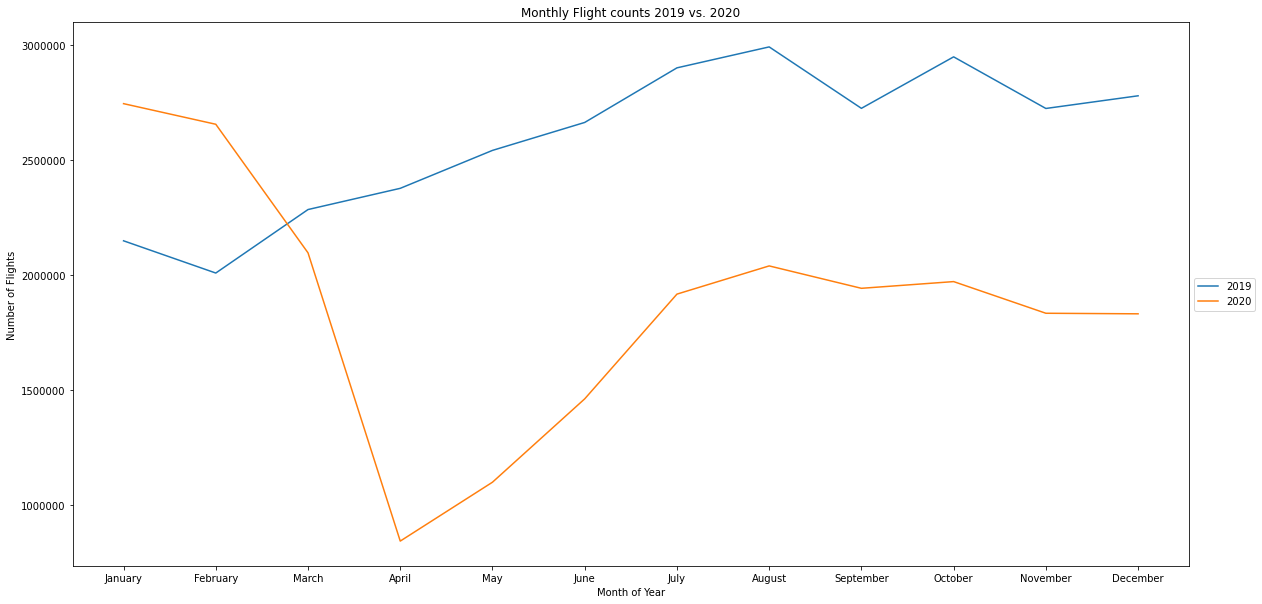

In [58]:
import matplotlib.ticker as ticker
od = collections.OrderedDict(sorted(d_counts.items()))

dates_d = pd.date_range('2019-01-01', '2020-12-30', freq='D')
df_year = pd.DataFrame(od.values(), columns=['Data'])
df_year.index = dates_d 

pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel() 

ax = plt.figure(figsize=(20,10)).add_subplot(111)
ax.plot(pt)

ticklabels = [datetime.date(1900, item, 1).strftime('%B') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis
ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel("Month of Year")
ax.set_ylabel("Number of Flights")
ax.set_title("Monthly Flight counts 2019 vs. 2020")
plt.show()